# Python simple and didatical implementation of perceptron for:
# Iris, logic Expressions, MNIST.

Based on:

Machine Learning class at UFPel 2016/02 - Prof: Ricardo Araújo Matsumura.


https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/


http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html#implementing-the-perceptron-rule-in-python


### Logic Expressions

In [1]:
from random import choice
from numpy import array, dot, random
unit_step = lambda x: 0 if x < 0 else 1

In [2]:
training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

w = random.rand(3)

errors = []
eta = 0.2
n = 100

for i in xrange(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x
    
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))




[0 0]: -0.0395666704218 -> 0
[0 1]: 0.855970805851 -> 1
[1 0]: 0.193928259017 -> 1
[1 1]: 1.08946573529 -> 1


In [3]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)

### Making some test with the iris dataset

In [107]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.wt = np.random.uniform(-0.5, 0.5, 1 + X.shape[1])
        print self.wt
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.wt[1:] +=  update * xi
                self.wt[0] +=  update
                #print str(update) +" and the transform "+str(int(update != 0.0))
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.wt[1:]) + self.wt[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)



In [159]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
#print df
y = df.iloc[0:100, 4].values
#print y
y = np.where(y == 'Iris-setosa', 0, 1)

#print y

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values
#print X
#print zip(X, y)

#Repare this returns the shape of the features we have
print X.shape[1]

[ 0.01921569  0.0054902 ]
2


[ 0.20754629  0.17736575 -0.19849899]
Weights: [ 0.20754629 -0.18263425  0.36150101]


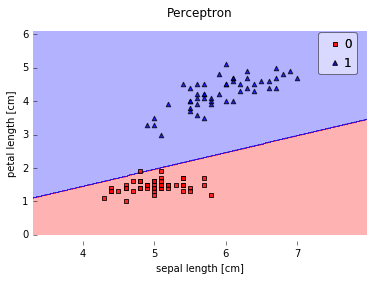

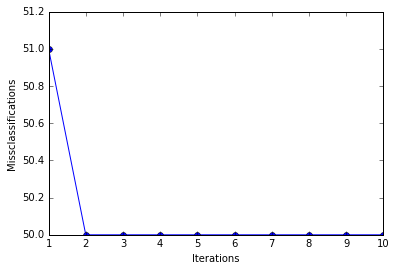

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.wt)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()


[ 0.04424436  0.46031969 -0.49643174]


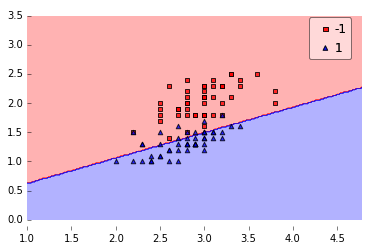

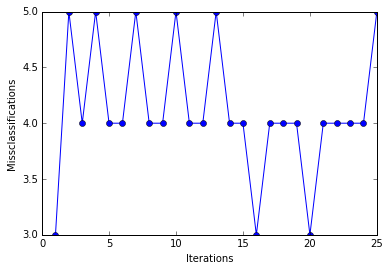

In [110]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)

# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values

ppn = Perceptron(epochs=25, eta=0.01)
ppn.train(X2, y2)

plot_decision_regions(X2, y2, clf=ppn)
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()



In [111]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn.predict(X2)).sum())

Total number of misclassifications: 14 of 100


### MNIST Problem

In [112]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
import pandas as pd

In [174]:
class Perceptron(object):
    
    def __init__(self, n, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.n = n
    
    def train(self):
        X, y = self.prepData()
        #self.w = np.random.rand(1, len(X[1])+1)
        #self.w  = [(x-0.5) for x in self.w]
        #print len(self.w)
        #self.w = self.w[0]
        self.w = np.random.uniform(-0.5, 0.5, len(X[1])+1)
        self.errors = []
        for _ in range(0, self.epochs):
            error = 0
            for x, target in zip(X, y):
                #print x
                coefUpd = self.lr *(target - self.pred(x))
                self.w[1:] += x*coefUpd
                self.w[0] +=coefUpd
                
                error +=int(coefUpd != 0.0) 
            self.errors.append(error)
            if(_%25 == 0):
                print ("Epoch: " + str(_) +", Error: "+str(error))
            
        return self
    
    def test(self):
        mat = [[0,0],[0,0]]
        dt = pd.read_csv("mnist_test.csv")
        y = dt.iloc[:,0].values
        y = np.where(y!=self.n, 0, 1)
        X = dt.iloc[:,1:].values
        
        for x, i in zip(X,y):
            if int(self.pred(x)) == i and i == 1: 
                mat[0][0]+=1
            elif int(self.pred(x)) == i and i == 0:
                mat[1][1]+=1
            elif int(self.pred(x)) != i and i == 1:
                mat[0][1]+=1
            elif int(self.pred(x)) != i and i == 0:
                mat[1][0]+=1
        
        return mat
        
                
    def step(self, dp):
        return np.where(dp >= 0, 1, 0)
    
    def dp(self, X):
        return np.dot(X,self.w[1:])+self.w[0]
    
    def pred(self, xi):
        return self.step(self.dp(xi))
    def predN(self, xi):
        return self.dp(xi)
    
    def prepData(self):
        tr = pd.read_csv("mnist_train.csv")
        #for some reason pandas give me the number 5 as the index to first
        #column my guess is 5 appears more in the data
        y = tr.iloc[:,0].values
        labels = y
        X = tr.iloc[:,1:].values
        y = np.where(y!=self.n, 0, 1)
        ls = [[]]
        ly = []
        print "Preparing it"
        for i,l in zip(y,X):
            if(i==1):
                ls.append(list(l))
                ly.append(int(i))
        ls.remove([])
      
        print "Extending it"
        for i in range(0,8):
            X = np.append(X, ls,axis = 0)
            y = np.append(y, ly, axis = 0)
            c = list(zip(X, y))
            random.shuffle(c)
            X, y = zip(*c)
        
        return X, y


In [161]:
labels = range(0,10)
print labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Fazendo testes para o numero 4

Preparing it
Extending it
Epoch: 0, Error: 3203


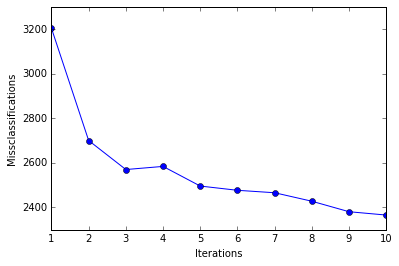

In [164]:
pctr = Perceptron(0, 0.001,10)
pctr.train()
#print('Weights: %s' % pctr.w)
#plot_decision_regions(X, y, clf=pctr)
#plt.title('Perceptron')
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
#plt.show()
#print pctr.w
plt.plot(range(1, len(pctr.errors)+1), pctr.errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()


In [183]:
import cv2
from IPython.display import Image, HTML, display
from glob import glob

ls = glob('imagens/*')
#print ls
imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
                     for s in sorted(ls[:2]) ])
cont = 0
for i in ls:
    img  = cv2.imread(i,0)
    
    if (pctr.pred(img.flatten()) == 1):
        cont+=1
        imagesList+=("<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(i))
        
#uncomment to display all N's values founded 

#display(HTML(imagesList))

print pctr.test()

[[283, 697], [1529, 7490]]


# Generalize

Preparing it
Extending it
Epoch: 0, Error: 3186
Epoch: 25, Error: 2292
Epoch: 50, Error: 2239
Epoch: 75, Error: 2228
Epoch: 100, Error: 2185
Epoch: 125, Error: 2211
Epoch: 150, Error: 2180
Epoch: 175, Error: 2152


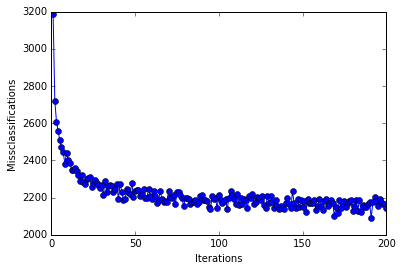

Preparing it
Extending it
Epoch: 0, Error: 2815
Epoch: 25, Error: 1942
Epoch: 50, Error: 1845
Epoch: 75, Error: 1888
Epoch: 100, Error: 1836
Epoch: 125, Error: 1821
Epoch: 150, Error: 1809
Epoch: 175, Error: 1810


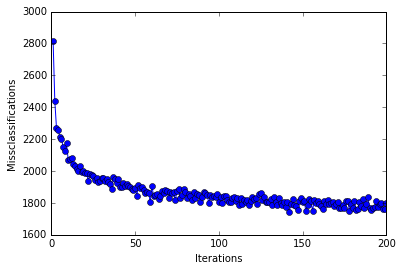

Preparing it
Extending it
Epoch: 0, Error: 8796
Epoch: 25, Error: 7736
Epoch: 50, Error: 7629
Epoch: 75, Error: 7615
Epoch: 100, Error: 7634
Epoch: 125, Error: 7659
Epoch: 150, Error: 7577
Epoch: 175, Error: 7597


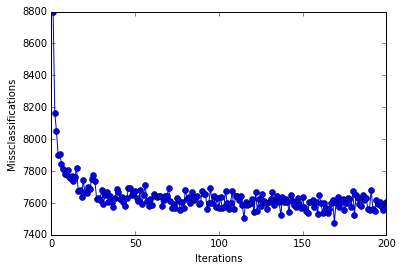

Preparing it
Extending it
Epoch: 0, Error: 10800
Epoch: 25, Error: 9927
Epoch: 50, Error: 9838
Epoch: 75, Error: 9772
Epoch: 100, Error: 9761
Epoch: 125, Error: 9776
Epoch: 150, Error: 9648
Epoch: 175, Error: 9704


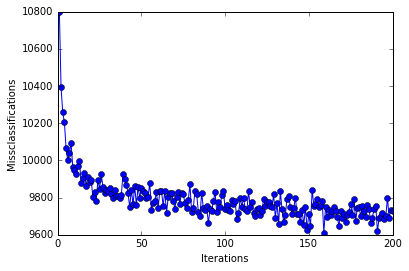

Preparing it
Extending it
Epoch: 0, Error: 5722
Epoch: 25, Error: 4488
Epoch: 50, Error: 4456
Epoch: 75, Error: 4400
Epoch: 100, Error: 4374
Epoch: 125, Error: 4364
Epoch: 150, Error: 4339
Epoch: 175, Error: 4327


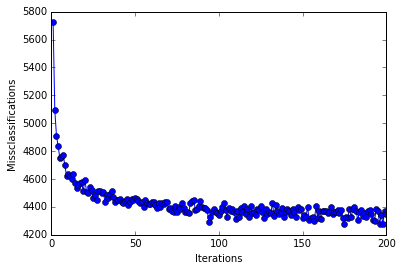

Preparing it
Extending it
Epoch: 0, Error: 11369
Epoch: 25, Error: 9647
Epoch: 50, Error: 9574
Epoch: 75, Error: 9525
Epoch: 100, Error: 9464
Epoch: 125, Error: 9512
Epoch: 150, Error: 9469
Epoch: 175, Error: 9445


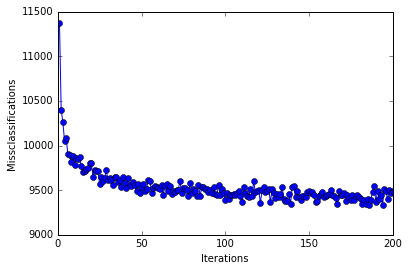

Preparing it
Extending it
Epoch: 0, Error: 4416
Epoch: 25, Error: 3743
Epoch: 50, Error: 3683
Epoch: 75, Error: 3656
Epoch: 100, Error: 3682
Epoch: 125, Error: 3663
Epoch: 150, Error: 3637
Epoch: 175, Error: 3626


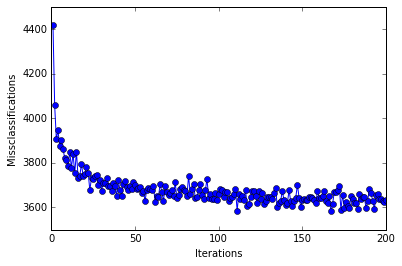

Preparing it
Extending it
Epoch: 0, Error: 5427
Epoch: 25, Error: 4528
Epoch: 50, Error: 4494
Epoch: 75, Error: 4414
Epoch: 100, Error: 4457
Epoch: 125, Error: 4416
Epoch: 150, Error: 4404
Epoch: 175, Error: 4427


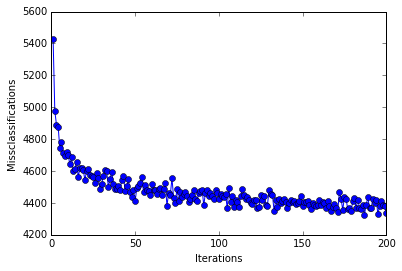

Preparing it
Extending it
Epoch: 0, Error: 17500
Epoch: 25, Error: 16508
Epoch: 50, Error: 16462
Epoch: 75, Error: 16333
Epoch: 100, Error: 16372
Epoch: 125, Error: 16240
Epoch: 150, Error: 16294
Epoch: 175, Error: 16271


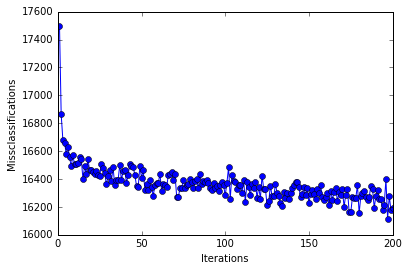

Preparing it
Extending it
Epoch: 0, Error: 11534
Epoch: 25, Error: 10508
Epoch: 50, Error: 10453
Epoch: 75, Error: 10457
Epoch: 100, Error: 10469
Epoch: 125, Error: 10439
Epoch: 150, Error: 10366
Epoch: 175, Error: 10414


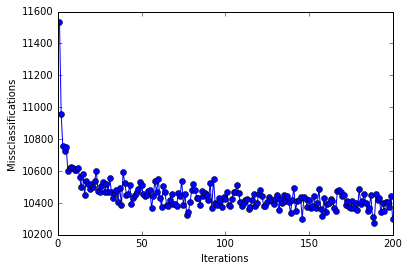

In [184]:
mnist = []
for i in range(0,10):
    mnist.append(Perceptron(i, 0.001, 200))
    mnist[i].train()
    plt.plot(range(1, len(mnist[i].errors)+1), mnist[i].errors, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Missclassifications')
    plt.show()

In [185]:
tot = 0
ct = 0
test = pd.read_csv("mnist_test.csv")
for i, line in zip(ls, range(0,9999)):
    mai = 0
    ind = -1
    img  = cv2.imread(i,0)
    for index,clf in zip(range(0,10),mnist):
        p = clf.predN(img.flatten())
        if p > mai:
            mai = p
            ind = index
    if(ind == test.iloc[line,0]):
        #print test.iloc[line, 0], ind
        ct+=1
    
    tot+=1
    
print float((ct/float(tot)*100))
print ct, tot
                    
for index,clf in zip(range(0,10),mnist):
    print "\n###########\nPara o "+str(index)
    mat = clf.test()
    print mat
    print "Precision: "+str(float(mat[0][0]/float(mat[0][0]+mat[0][1]))*100)
    print "Accuracy: "+str(float(mat[0][0]+mat[1][1])/float(mat[0][0]+mat[0][1]+mat[1][1]+mat[1][0])*100)
    

9.57095709571
957 9999

###########
Para o 0
[[939, 41], [93, 8926]]
Precision: 95.8163265306
Accuracy: 98.6598659866

###########
Para o 1
[[1122, 13], [116, 8748]]
Precision: 98.8546255507
Accuracy: 98.7098709871

###########
Para o 2
[[918, 114], [571, 8396]]
Precision: 88.9534883721
Accuracy: 93.1493149315

###########
Para o 3
[[896, 114], [308, 8681]]
Precision: 88.7128712871
Accuracy: 95.7795779578

###########
Para o 4
[[945, 37], [365, 8652]]
Precision: 96.2321792261
Accuracy: 95.9795979598

###########
Para o 5
[[604, 288], [118, 8989]]
Precision: 67.7130044843
Accuracy: 95.9395939594

###########
Para o 6
[[928, 30], [371, 8670]]
Precision: 96.8684759916
Accuracy: 95.9895989599

###########
Para o 7
[[915, 112], [119, 8853]]
Precision: 89.0944498539
Accuracy: 97.6897689769

###########
Para o 8
[[793, 181], [890, 8135]]
Precision: 81.4168377823
Accuracy: 89.2889288929

###########
Para o 9
[[954, 55], [1091, 7899]]
Precision: 94.5490584737
Accuracy: 88.5388538854


# The classifier is going well when you look just to one classifier, I mean for example, just to the classifier especialized in the 0, but when you try to generate a general one, it is not possible to define what is the number, cause you have one-hot-vector with more than one true.

## [0 0 1 0 0 1 0 0 1 0]

# And most of times the greatest value outputed trough the somatory is no the correct one, so you get less than 10% of general accuracy

Outputs generated to 0.0001 and 1000 iterations

###########
Para o 0
[[959, 21], [153, 8866]]
Precision: 97.8571428571
Accuracy: 98.2598259826

###########
Para o 1
[[1108, 27], [117, 8747]]
Precision: 97.6211453744
Accuracy: 98.5598559856

###########
Para o 2
[[950, 82], [476, 8491]]
Precision: 92.0542635659
Accuracy: 94.4194419442

###########
Para o 3
[[952, 58], [669, 8320]]
Precision: 94.2574257426
Accuracy: 92.7292729273

###########
Para o 4
[[922, 60], [261, 8756]]
Precision: 93.8900203666
Accuracy: 96.7896789679

###########
Para o 5
[[869, 23], [2161, 6946]]
Precision: 97.4215246637
Accuracy: 78.1578157816

###########
Para o 6
[[861, 97], [129, 8912]]
Precision: 89.8747390397
Accuracy: 97.7397739774

###########
Para o 7
[[967, 60], [330, 8642]]
Precision: 94.1577409932
Accuracy: 96.099609961

###########
Para o 8
[[929, 45], [2263, 6762]]
Precision: 95.3798767967
Accuracy: 76.9176917692

###########
Para o 9
[[940, 69], [897, 8093]]
Precision: 93.1615460852
Accuracy: 90.3390339034

In [186]:
print 986/float(10000)

0.0986


In [1]:
"""import pickle

# write python dict to a file
with open('myfile.pkl', 'wb') as output:
    for i in mnist:
        pickle.dump(i.w, output)"""

# read python dict back from the file
#pkl_file = open('myfile.pkl', 'rb')
#mydict2 = pickle.load(pkl_file)
#pkl_file.close()

#print mydict
#print mydict2


"import pickle\n\n# write python dict to a file\nwith open('myfile.pkl', 'wb') as output:\n    for i in mnist:\n        pickle.dump(i.w, output)"

# The trained weights are in a .pkl on the root.